<Figure size 1000x500 with 0 Axes>

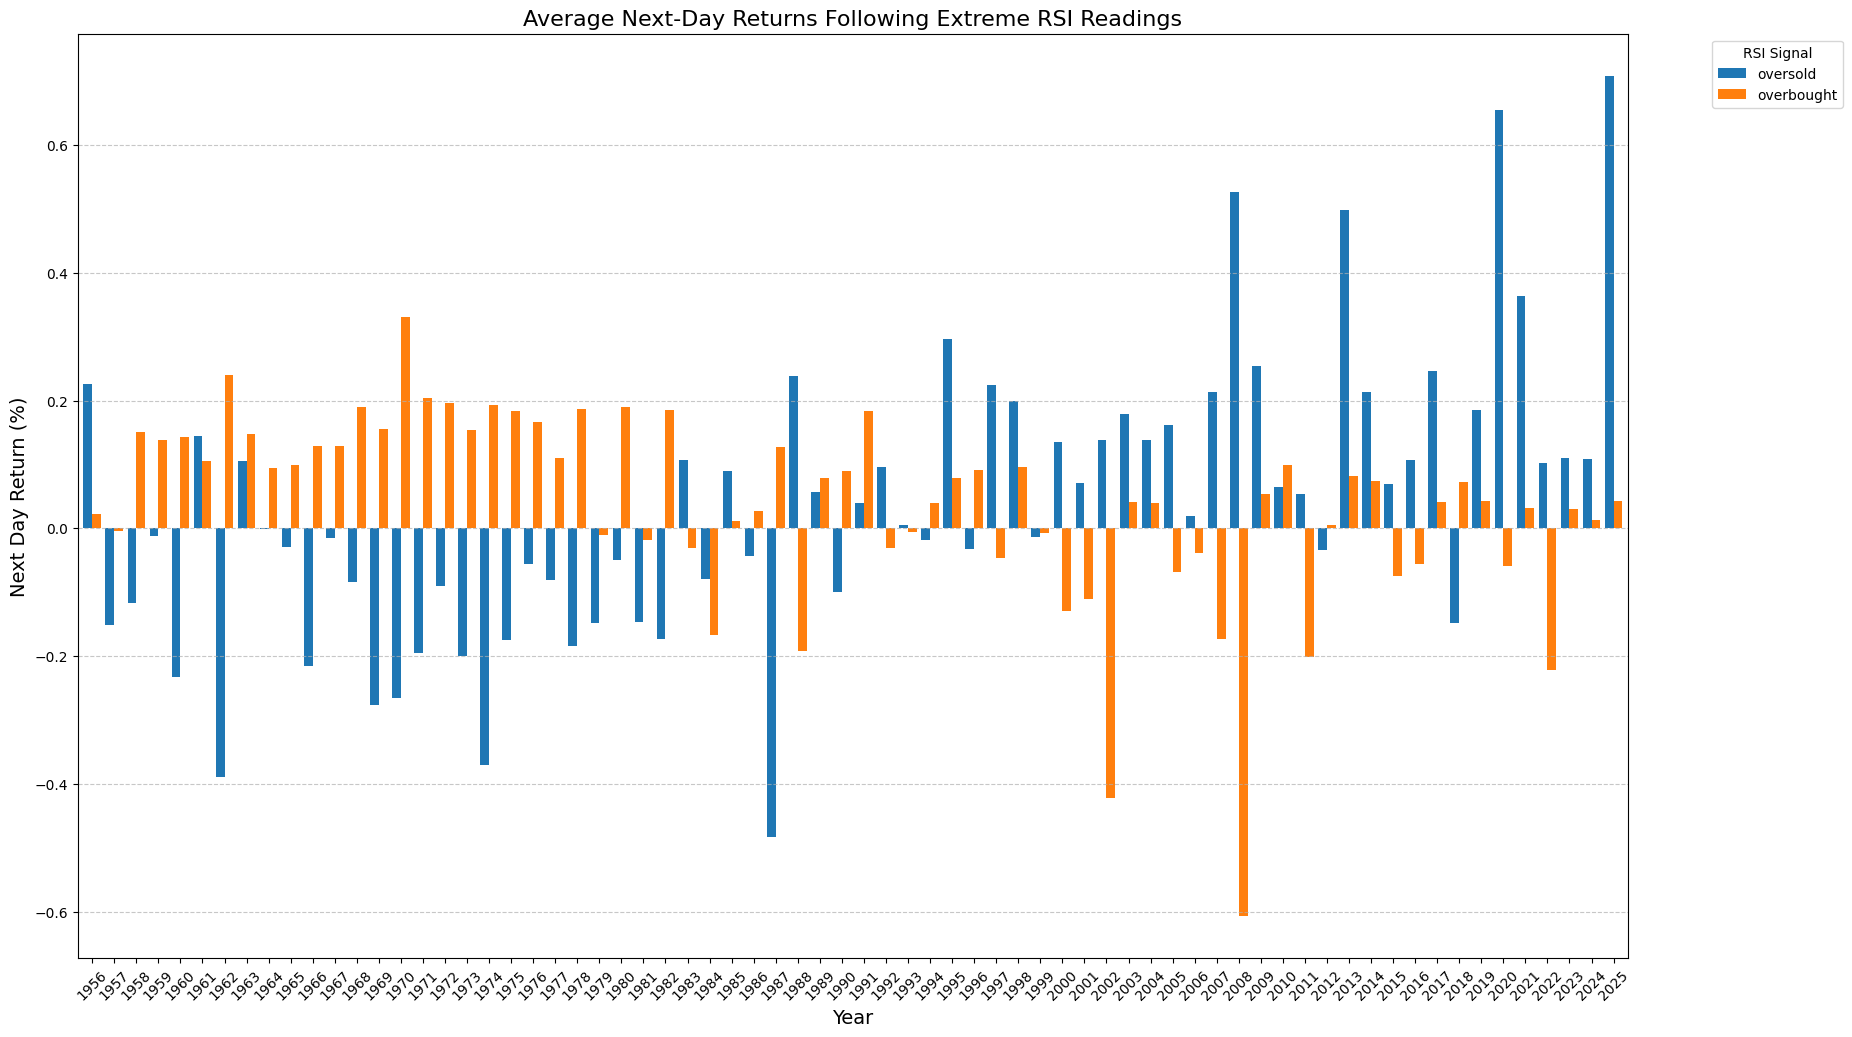

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('CSV/SPX_RSI_2.csv')

df['time'] = pd.to_datetime(df['time'])

# Calculate forward 1-day returns
df['forward_return'] = df['close'].shift(-1) / df['close'] - 1
df['forward_return'] = df['forward_return'] * 100  # Convert to percentage

# Create RSI signals
df['RSI_signal'] = pd.cut(df['RSI'], 
                         bins=[0, 20, 80, 100],
                         labels=['oversold', 'neutral', 'overbought'],
                         include_lowest=True)

# Filter for only extreme RSI readings
df_signals = df[df['RSI_signal'].isin(['oversold', 'overbought'])].copy()

# Extract the year
df_signals['year'] = df_signals['time'].dt.year

# Group by year and RSI signal to get average forward returns
result = df_signals.groupby(['year', 'RSI_signal'], observed=True)['forward_return'].mean().unstack()

plt.figure(figsize=(10, 5))  #
result.plot(kind='bar', width=0.8)

plt.title('Average Next-Day Returns Following Extreme RSI Readings', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Next Day Return (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='RSI Signal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<Figure size 1000x500 with 0 Axes>

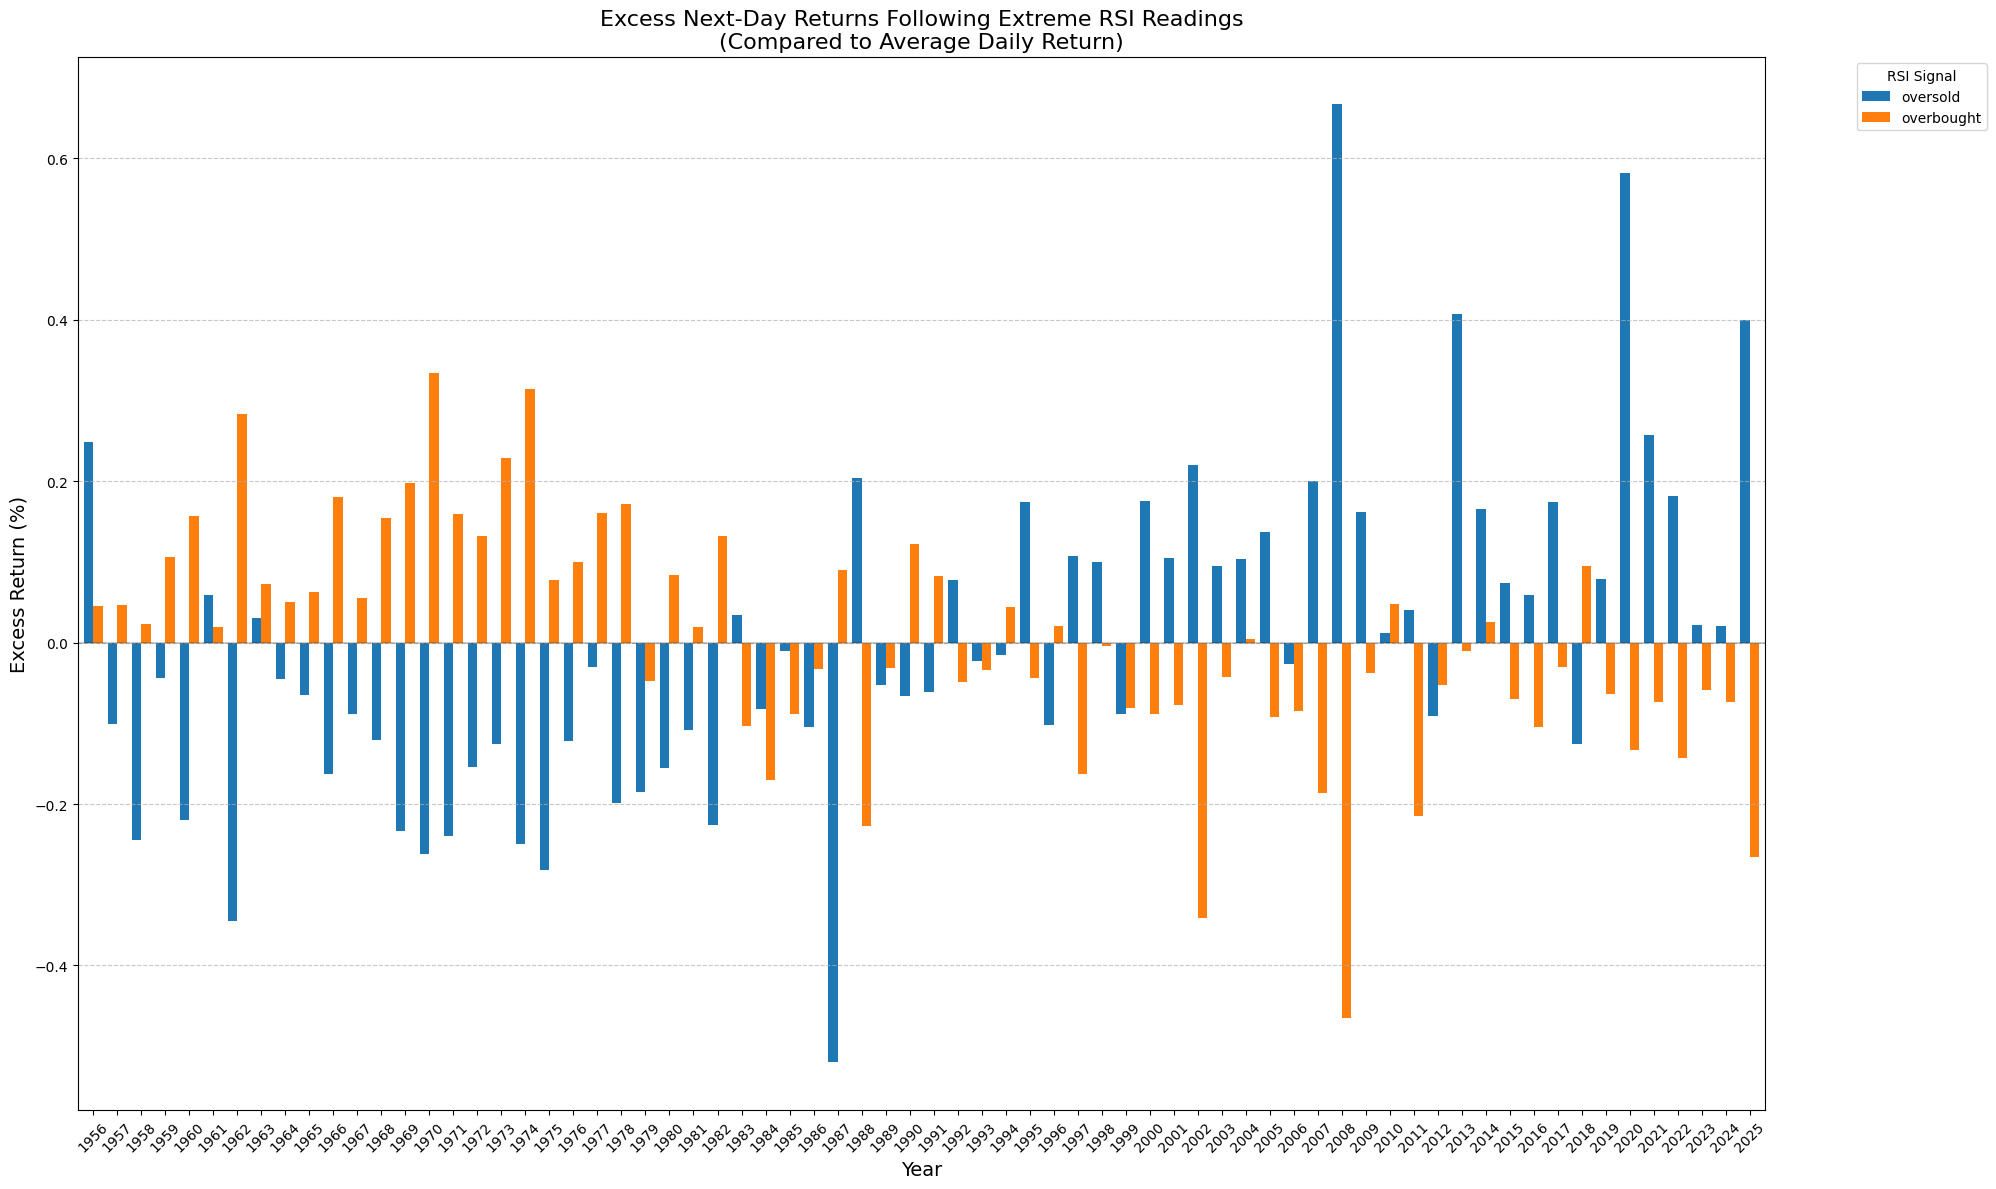

In [66]:
df['time'] = pd.to_datetime(df['time'])

# Calculate forward 1-day returns
df['forward_return'] = df['close'].shift(-1) / df['close'] - 1
df['forward_return'] = df['forward_return'] * 100

# Create RSI signals
df['RSI_signal'] = pd.cut(df['RSI'], 
                         bins=[0, 20, 80, 100],
                         labels=['oversold', 'neutral', 'overbought'],
                         include_lowest=True)

df['year'] = df['time'].dt.year

yearly_baseline = df.groupby('year')['forward_return'].mean()

df_signals = df[df['RSI_signal'].isin(['oversold', 'overbought'])].copy()

result = df_signals.groupby(['year', 'RSI_signal'], observed=True)['forward_return'].mean().unstack()

for signal in result.columns:
    result[signal] = result[signal] - yearly_baseline


plt.figure(figsize=(10, 5))
result.plot(kind='bar', width=0.8)

plt.title('Excess Next-Day Returns Following Extreme RSI Readings\n(Compared to Average Daily Return)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Excess Return (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='RSI Signal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.axhline(y=0, color='black', linestyle='-', alpha=0.2)

plt.tight_layout()
plt.show()

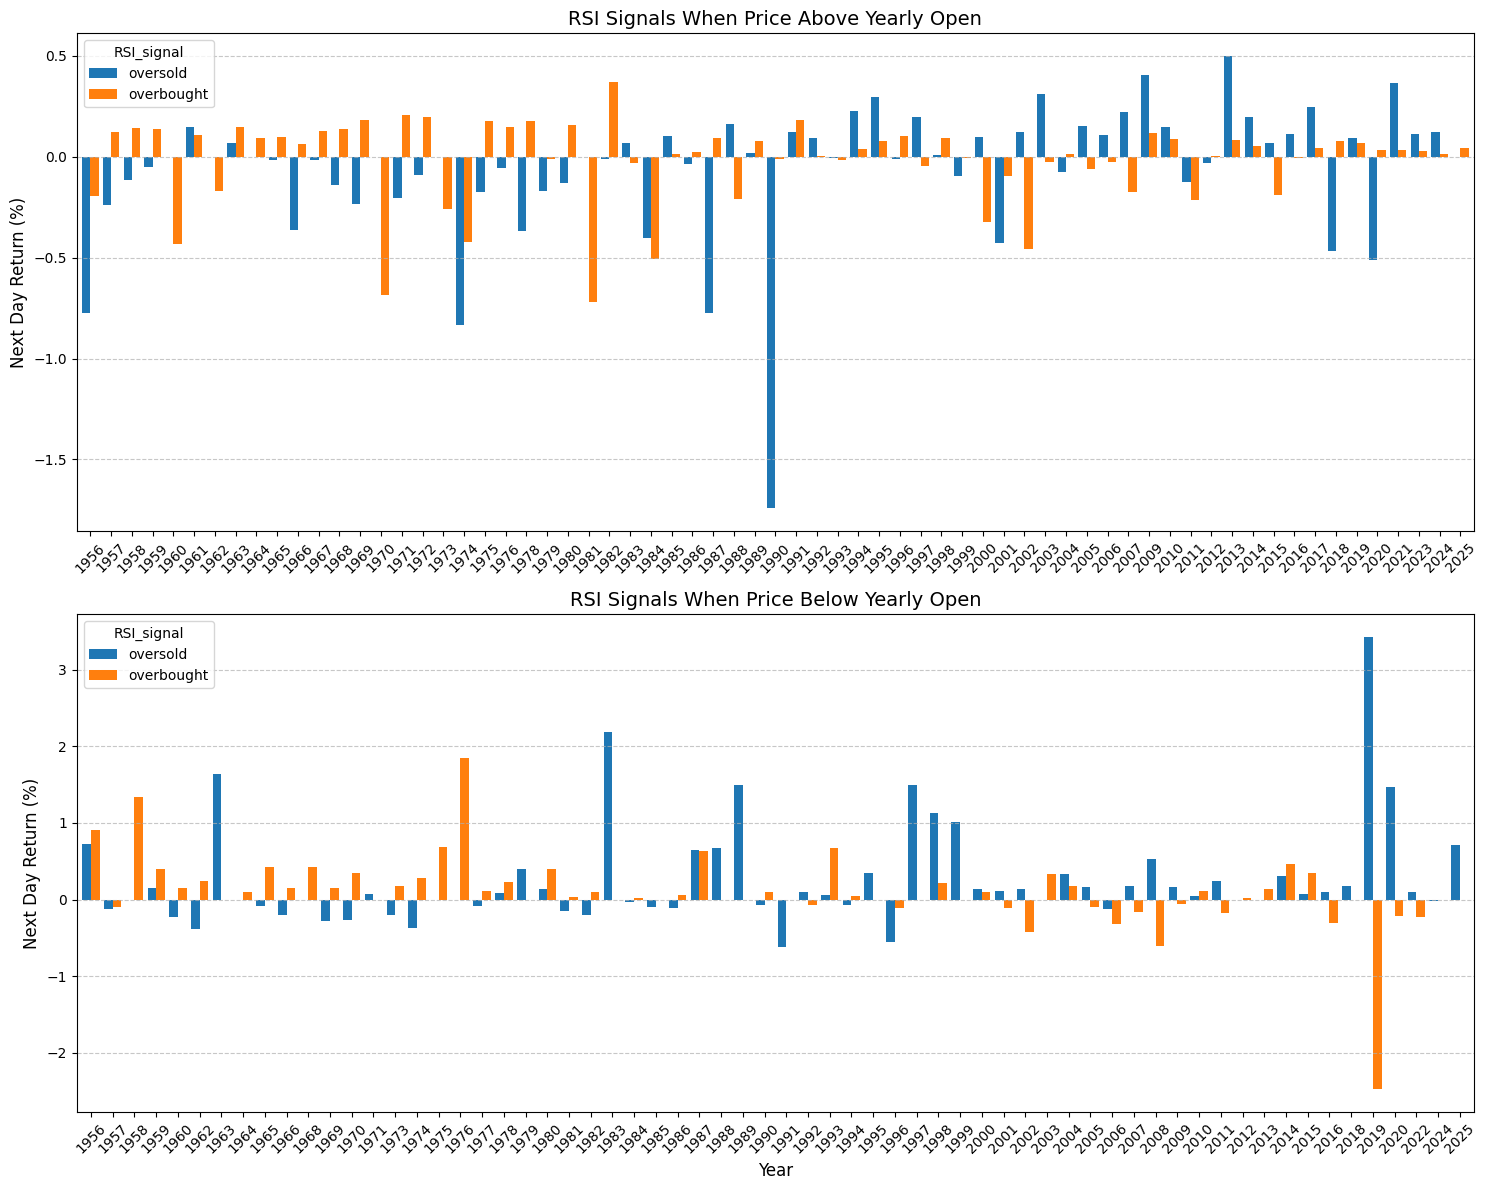

In [67]:
df['time'] = pd.to_datetime(df['time'])
df['forward_return'] = df['close'].shift(-1) / df['close'] - 1
df['forward_return'] = df['forward_return'] * 100


df['RSI_signal'] = pd.cut(df['RSI'], 
                         bins=[0, 20, 80, 100],
                         labels=['oversold', 'neutral', 'overbought'],
                         include_lowest=True)

df['year'] = df['time'].dt.year
yearly_opens = df.groupby(df['year'])['close'].first()

df['above_yearly_open'] = False
for year in df['year'].unique():
    year_data = df[df['year'] == year]
    yearly_open = yearly_opens[year]
    df.loc[df['year'] == year, 'above_yearly_open'] = df['close'] > yearly_open


df_signals = df[df['RSI_signal'].isin(['oversold', 'overbought'])].copy()

# Create two separate results for above and below yearly open
above_open = df_signals[df_signals['above_yearly_open']].groupby(['year', 'RSI_signal'], observed=True)['forward_return'].mean().unstack()
below_open = df_signals[~df_signals['above_yearly_open']].groupby(['year', 'RSI_signal'], observed=True)['forward_return'].mean().unstack()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot for price above yearly open
if not above_open.empty:
    above_open.plot(kind='bar', width=0.8, ax=ax1)
    ax1.set_title('RSI Signals When Price Above Yearly Open', fontsize=14)
    ax1.set_xlabel('')
    ax1.set_ylabel('Next Day Return (%)', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot for price below yearly open
if not below_open.empty:
    below_open.plot(kind='bar', width=0.8, ax=ax2)
    ax2.set_title('RSI Signals When Price Below Yearly Open', fontsize=14)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_ylabel('Next Day Return (%)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
